In [35]:
import ipynb.fs.defs.Model as model
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

Loading data


100%|█████████████████████████████████████████████████████| 18/18 [00:00<00:00, 22.24it/s]


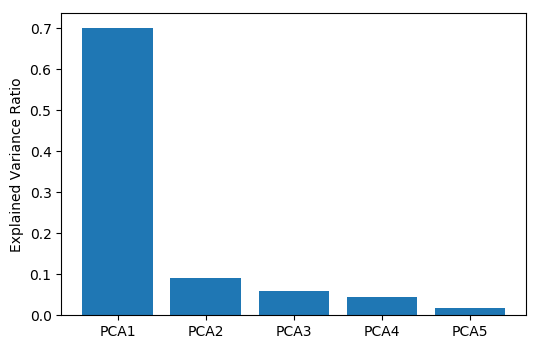

In [36]:
from sklearn.decomposition import PCA

X, y = model.get_match_data(week=1)

pca = PCA(n_components=5, random_state=42)
pca.fit(X)
variance_ratios = pca.explained_variance_ratio_
plt.figure(1, figsize=(6,4))
plt.bar([i for i in range(len(variance_ratios))], variance_ratios)
plt.xticks([i for i in range(len(variance_ratios))], ['PCA'+str(i+1) for i in range(len(variance_ratios))])
plt.ylabel('Explained Variance Ratio')
plt.show()

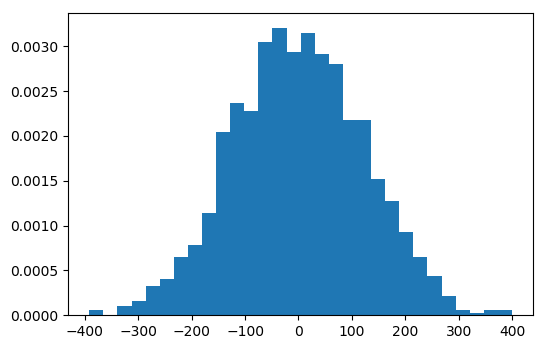

In [37]:
X_transform = pca.transform(X)
plt.hist(X_transform[:,0], density=True, bins=30)
plt.show()

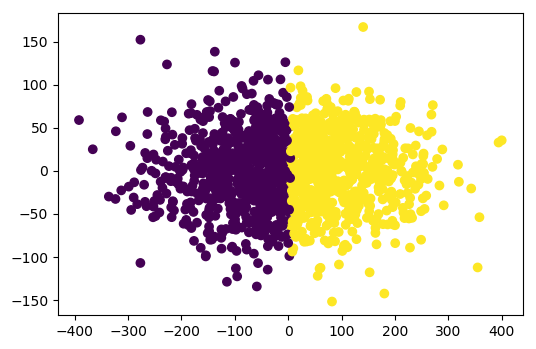

In [38]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
clusterer = GaussianMixture(n_components=2, random_state=72).fit(X_transform[:,:1])
preds = clusterer.predict(X_transform[:,:1])
plt.scatter(X_transform[:,0], X_transform[:,1], c=preds)
plt.show()

In [5]:
score = silhouette_score(X_transform[:,:1], preds)
score

0.558617162797158

In [39]:
import ipynb.fs.defs.Model as model
data = model.pca_matches(2, True, num=2)

Loading match data to train on


100%|█████████████████████████████████████████████████████| 42/42 [00:02<00:00, 18.64it/s]


Training set has 2863 samples and 2 features.
Testing set has 506 samples and 2 features.

Unoptimized model
------
Accuracy score on training data: 0.8243
Accuracy score on testing data: 0.8419
F-score on testing data: 0.8501
Average precision score on testing data: 0.7990

Optimized Model
------
Final accuracy score on training data: 0.8226
Final accuracy score on the testing data: 0.8458
Final F-score on the testing data: 0.8511
Final average precision score on testing data: 0.8015



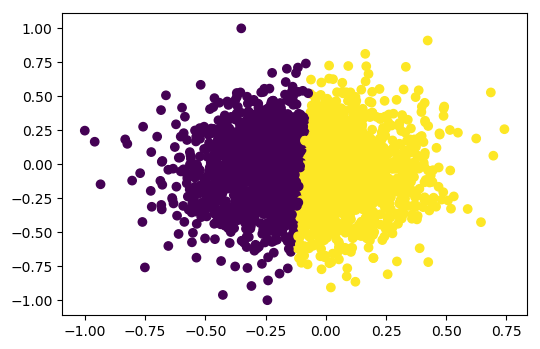

In [40]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1])
plt.show()

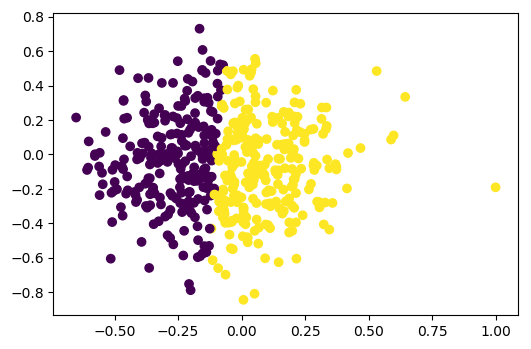

In [41]:
plt.scatter(data[2][:,0], data[2][:,1], c=data[3])
plt.show()

In [7]:
import ipynb.fs.defs.Model as model
model.matches(2, True, False)

Loading match data to train on


100%|█████████████████████████████████████████████████████| 42/42 [00:02<00:00, 19.65it/s]


Training set has 2863 samples and 748 features.
Testing set has 506 samples and 748 features.

Unoptimized model
------
Accuracy score on training data: 0.8833
Accuracy score on testing data: 0.8735
F-score on testing data: 0.8826
Average precision score on testing data: 0.8374

Optimized Model
------
Final accuracy score on training data: 0.9347
Final accuracy score on the testing data: 0.8972
Final F-score on the testing data: 0.9059
Final average precision score on testing data: 0.8667

                                                0
Auto_None_a                             -2.615691
Auto_Reached_a                           5.143963
Auto_Crossed_a                          -9.652220
Auto_None_stdev                          1.076300
Auto_Reached_stdev                     -15.242497
Auto_Crossed_stdev                      -3.248483
Score_stdev                             -1.725123
DScore_stdev                             4.232545
Ranking_Score_a                         78.514122
Auto_

In [42]:
import ipynb.fs.defs.Model as model
data = model.future_matches_pred(2, True, False)

Loading match data to train on


100%|█████████████████████████████████████████████████████| 18/18 [00:00<00:00, 21.22it/s]


Training set has 1396 samples and 748 features.

Loading future data to predict on


100%|█████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.73it/s]


0.895590471363406
0.9041177640740004
0.8646769458118566

0.6756208819057273
0.6643732530638572
0.6029434003259192


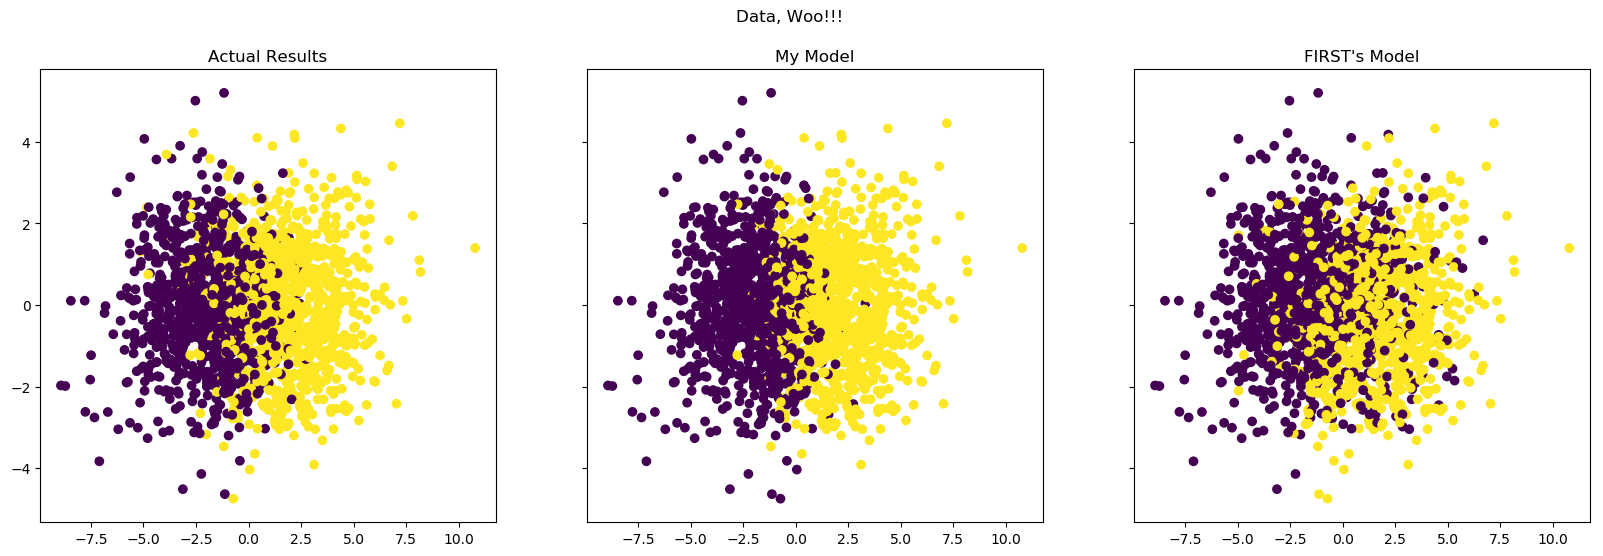

In [50]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20,6))
f.suptitle('Data, Woo!!!')
ax1.scatter(data[4][:,0], data[4][:,1], c=data[7])
ax1.set_title("Actual Results")
ax2.scatter(data[4][:,0], data[4][:,1], c=data[5])
ax2.set_title("My Model")
ax3.scatter(data[4][:,0], data[4][:,1], c=data[6])
ax3.set_title("FIRST's Model")
plt.show()